In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [29]:
df = pd.read_csv('car.data', names= ['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety', 'Class_Values'])

In [87]:
df.head()

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Class_Values
0,4,4,2,2,1,1,unacc
1,4,4,2,2,1,2,unacc
2,4,4,2,2,1,3,unacc
3,4,4,2,2,2,1,unacc
4,4,4,2,2,2,2,unacc


In [31]:
df['Buying'].value_counts()

low      432
med      432
high     432
vhigh    432
Name: Buying, dtype: int64

In [32]:
def buying(x):
    if x == 'low':
        return 1
    elif x == 'med':
        return 2
    elif x == 'high':
        return 3
    else:
        return 4

In [33]:
df['Buying'] = df['Buying'].apply(buying)

In [35]:
df['Maint'] = df['Maint'].apply(buying)

In [38]:
df['Lug_boot'].value_counts()

small    576
med      576
big      576
Name: Lug_boot, dtype: int64

In [39]:
def boot(x):
    if x == 'small':
        return 1
    elif x == 'med':
        return 2
    else:
        return 3

In [41]:
df['Lug_boot'] = df['Lug_boot'].apply(boot)

In [49]:
df['Safety'] = df['Safety'].apply(safety)

In [47]:
def safety(x):
    if x == 'low':
        return 1
    elif x == 'med':
        return 2
    else:
        return 3

In [93]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [95]:
X = df.drop('Class_Values', 1).values
y = df['Class_Values'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [94]:
scaler = MinMaxScaler()

In [97]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Buying        1728 non-null   int64 
 1   Maint         1728 non-null   int64 
 2   Doors         1728 non-null   object
 3   Persons       1728 non-null   object
 4   Lug_boot      1728 non-null   int64 
 5   Safety        1728 non-null   int64 
 6   Class_Values  1728 non-null   object
dtypes: int64(4), object(3)
memory usage: 74.3+ KB


In [63]:
df['Doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [67]:
np.random.randint(5,10)

5

In [78]:
def doors(x):
    if x == '2':
        return 2
    elif x == '3':
        return 3
    elif x == '4':
        return 4
    else:
        return np.random.randint(5,11)

In [80]:
df['Doors'] = df['Doors'].apply(doors)

In [83]:
df['Persons'].unique()

array(['2', '4', 'more'], dtype=object)

In [84]:
def persons(x):
    if x == '2':
        return 2
    elif x == '4':
        return 4
    else:
        return np.random.randint(6,11)

In [86]:
df['Persons'] = df['Persons'].apply(persons)

In [99]:
X_train = scaler.transform(X_train)

In [100]:
X_test = scaler.transform(X_test)

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [104]:
rfc = RandomForestClassifier()

In [106]:
grid = GridSearchCV(rfc, param_grid= {'n_estimators': [100,200,300,400,500,600,700] }, verbose= 1)

In [107]:
grid.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   34.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [108]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [109]:
rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [110]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [111]:
pred= rfc.predict(X_test)

In [112]:
from sklearn.metrics import classification_report

In [113]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         acc       0.93      0.88      0.90       129
        good       0.66      0.95      0.78        20
       unacc       0.99      0.98      0.99       397
       vgood       0.88      0.88      0.88        25

    accuracy                           0.96       571
   macro avg       0.86      0.92      0.89       571
weighted avg       0.96      0.96      0.96       571



In [114]:
from sklearn.tree import DecisionTreeClassifier

In [115]:
dtc = DecisionTreeClassifier()

In [116]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [117]:
d_pred = dtc.predict(X_test)

In [118]:
print(classification_report(y_test, d_pred))

              precision    recall  f1-score   support

         acc       0.93      0.90      0.91       129
        good       0.63      0.85      0.72        20
       unacc       0.99      0.98      0.99       397
       vgood       0.88      0.84      0.86        25

    accuracy                           0.95       571
   macro avg       0.86      0.89      0.87       571
weighted avg       0.96      0.95      0.96       571



In [120]:
from sklearn.svm import SVC

In [121]:
svc = SVC()

In [123]:
grid = GridSearchCV(estimator= svc, param_grid= {'C': [0.1,1,10,100,1000], 'gamma': [1,10,0.1,0.01,0.001]}, verbose= 1)

In [124]:
grid.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    4.8s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 10, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [125]:
grid.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [126]:
svc = SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [127]:
svc.fit(X_train, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [128]:
s_pred = svc.predict(X_test)

In [130]:
print(classification_report(y_test, s_pred))

              precision    recall  f1-score   support

         acc       0.91      0.87      0.89       129
        good       0.70      0.95      0.81        20
       unacc       0.97      0.98      0.98       397
       vgood       0.96      0.88      0.92        25

    accuracy                           0.95       571
   macro avg       0.89      0.92      0.90       571
weighted avg       0.95      0.95      0.95       571



In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
log = LogisticRegression()

In [133]:
log.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [134]:
l_pred = log.predict(X_test)

In [135]:
print(classification_report(y_test, l_pred))

              precision    recall  f1-score   support

         acc       0.50      0.40      0.44       129
        good       0.00      0.00      0.00        20
       unacc       0.82      0.95      0.88       397
       vgood       0.50      0.08      0.14        25

    accuracy                           0.76       571
   macro avg       0.45      0.36      0.37       571
weighted avg       0.70      0.76      0.72       571



In [136]:
from sklearn.neighbors import KNeighborsClassifier

In [139]:
error = []

for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    k_pred = knn.predict(X_test)
    error.append(np.mean(k_pred != y_test))

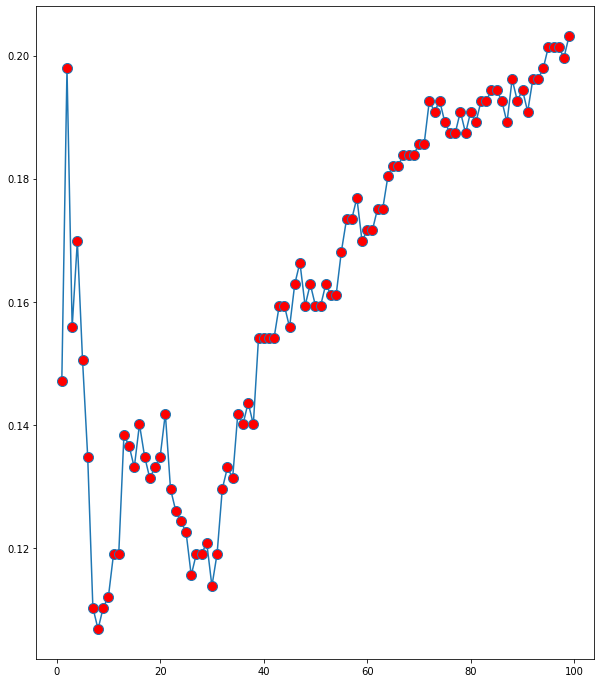

In [143]:
plt.figure(figsize=(10,12))
plt.plot(range(1,100), error, marker = 'o', markersize = 10, markerfacecolor = 'r')

In [144]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
k_pred = knn.predict(X_test)

In [145]:
print(classification_report(y_test, k_pred))

              precision    recall  f1-score   support

         acc       0.78      0.83      0.80       129
        good       0.58      0.70      0.64        20
       unacc       0.95      0.95      0.95       397
       vgood       1.00      0.48      0.65        25

    accuracy                           0.89       571
   macro avg       0.83      0.74      0.76       571
weighted avg       0.90      0.89      0.89       571

